# Exploration of the Flights 2009 Dataset
## by Bryan Beus

## Preliminary Wrangling

This is the 2009 Data Expo Airline on-time performance dataset. This data provides information on flight performance based on a number of factors, including location, time of day, and more.

This exploratory analysis looks at the dataset using univariate, bivariate, and multivariate methods.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

My computer does not have enough RAM to handle this large dataset, so I am only reading in `50` thousand rows.

In [5]:
df = pd.read_csv('DataExpo2009/2008.csv', nrows=50000)

In [6]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
df.shape

(50000, 29)

In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
df_clean = df.copy()

### What is the structure of your dataset?

The 2008 csv file of the Data Expo 2009 dataset contains `29` columns and roughly `7` million rows. To work within the limitations of my computer's RAM, I have only read in `50000` rows. `5` of the columns are string-based, while `24` are numerical.

The column name interpretations are as follows:

```
Year
year of the flight (stored as factor).

Month
month of the flight (stored as factor).

DayOfMonth
day of the month (1 to 31) (stored as integer).

DayOfWeek
day of the week (stored as factor).

DepTime
actual departure time (stored as float).

CRSDepTime
scheduled departure time (stored as float).

ArrTime
actual arrival time (stored as float).

CRSArrTime
scheduled arrival time (stored as float).

UniqueCarrier
carrier ID (stored as factor).

FlightNum
flight number (stored as factor).

TailNum
plane's tail number (stored as factor).

ActualElapsedTime
actual elapsed time of the flight, in minutes (stored as integer).

CRSElapsedTime
scheduled elapsed time of the flight, in minutes (stored as integer).

AirTime
airborne time for the flight, in minutes (stored as integer).

ArrDelay
arrival delay, in minutes (stored as integer).

DepDelay
departure delay, in minutes (stored as integer).

Origin
originating airport (stored as factor).

Dest
destination airport (stored as factor).

Distance
flight distance (stored as integer).

TaxiIn
taxi time from wheels down to arrival at the gate, in minutes (stored as integer).

TaxiOut
taxi time from departure from the gate to wheels up, in minutes (stored as integer).

Cancelled
cancellation status (stored as logical).

CancellationCode
cancellation code, if applicable (stored as factor).

Diverted
diversion status (stored as logical).

CarrierDelay
delay, in minutes, attributable to the carrier (stored integer).

WeatherDelay
delay, in minutes, attributable to weather factors (stored as integer).

NASDelay
delay, in minutes, attributable to the National Aviation System (stored as integer).

SecurityDelay
delay, in minutes, attributable to security factors (stored as integer).

LateAircraftDelay
delay, in minutes, attributable to late-arriving aircraft (stored as integer).
```

### What is/are the main feature(s) of interest in your dataset?

The features that pertain to time, location, and carrier are of interest for analyzing flight delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For the univariate section of the analysis, several features of interest are `AirTime`, `ArrDelay`, `DepDelay`, `Origin`, and `Dest`. These features provide an introduction to the dataset and can be used as a stepping stone to later bivariate and multivariate analysis.

## Univariate Exploration

#### AirTime

In [9]:
df_clean['AirTime'].describe()

count    49293.000000
mean        90.535573
std         54.125934
min         25.000000
25%         52.000000
50%         70.000000
75%        116.000000
max        360.000000
Name: AirTime, dtype: float64

In [10]:
df_clean['AirTime'].isnull().sum()

707

In [11]:
df_clean[df_clean['AirTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,700,NaN,830,WN,126,NaN,NaN,90,NaN,NaN,NaN,LAS,OAK,407,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,NaN,75,NaN,NaN,NaN,LAX,OAK,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,NaN,65,NaN,NaN,NaN,LAX,SJC,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48174,2008,1,17,4,NaN,1325,NaN,1435,WN,2791,NaN,NaN,70,NaN,NaN,NaN,SJC,LAX,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
48416,2008,1,17,4,NaN,1220,NaN,1430,WN,522,NaN,NaN,130,NaN,NaN,NaN,STL,HOU,687,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
49521,2008,1,18,5,2123.0,2055,NaN,2145,WN,53,N707SA,NaN,50,NaN,NaN,28.0,HOU,CRP,187,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
49546,2008,1,18,5,NaN,1930,NaN,2025,WN,54,NaN,NaN,55,NaN,NaN,NaN,HOU,DAL,239,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


The `AirTime` column shows approximately `49` thousand entries, with `707` entries listed as null. In the entries where `AirTime` is null, the `Cancelled` feature has a positive value of `1`, which explains these missing rows.

In [12]:
df_clean[df_clean['AirTime'] == 0.0].shape[0]

0

In the full `7` million dataset, there are rows in the `AirTime` feature that have a value of `0.0`. These rows, however, do not feature in the limited dataset, and therefore they are not explored further here.

In [14]:
df_clean[df_clean['AirTime'] == 0.0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


The 'AirTime' feature has several rows where the value is 0, but the flight was not cancelled. In some of these rows, there are data values in the `ArrDealy` and other `...Delay` features that provide a little bit of explanation, but not much. In other columns, no explanation is provided at all. 

These rows would be dropped in the full dataset, but they are not here, due to the RAM issue.

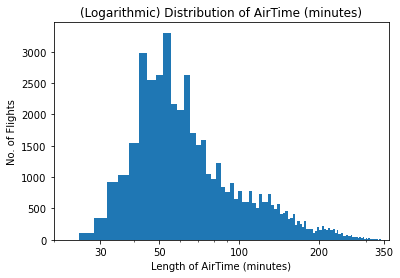

In [38]:
log_binsize = 5;
xtick_vals = 10 ** np.arange(df_clean['AirTime'].min() - 5, np.log10(df_clean['AirTime'].max()) + log_binsize, log_binsize)

plt.hist(data=df_clean, x='AirTime', bins=100);
plt.xscale('log');
plt.title('(Logarithmic) Distribution of AirTime (minutes)');
plt.xlim(df_clean['AirTime'].min() - 5, df_clean['AirTime'].max() + 5);
plt.ylabel('No. of Flights');
plt.xlabel('Length of AirTime (minutes)');
plt.xticks([30, 50, 100, 200, 350], [30, 50, 100, 200, 350]);
plt.show();

The `AirTime` values are highly skewed to the right, therefore the logarithmic scale is appropriate for the x-axis. 

The mode appears to be approximately `50` minutes. There appears to be a slight secondary peak in the data at approximatley `200` minutes.

#### DepDelay

In [39]:
df_clean['DepDelay'].describe()

count    49365.000000
mean         9.588696
std         24.418112
min        -16.000000
25%         -2.000000
50%          1.000000
75%         10.000000
max        508.000000
Name: DepDelay, dtype: float64

In [40]:
df_clean['DepDelay'].isnull().sum()

635

In [41]:
df_clean[df_clean['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,700,NaN,830,WN,126,NaN,NaN,90,NaN,NaN,NaN,LAS,OAK,407,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,NaN,75,NaN,NaN,NaN,LAX,OAK,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,NaN,65,NaN,NaN,NaN,LAX,SJC,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47933,2008,1,17,4,NaN,855,NaN,1025,WN,1044,NaN,NaN,90,NaN,NaN,NaN,SAN,OAK,446,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
47936,2008,1,17,4,NaN,2045,NaN,2215,WN,1280,NaN,NaN,90,NaN,NaN,NaN,SAN,OAK,446,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
48174,2008,1,17,4,NaN,1325,NaN,1435,WN,2791,NaN,NaN,70,NaN,NaN,NaN,SJC,LAX,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
48416,2008,1,17,4,NaN,1220,NaN,1430,WN,522,NaN,NaN,130,NaN,NaN,NaN,STL,HOU,687,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


The `AirTime` column shows approximately `49` thousand entries, with `707` entries listed as null. In the entries where `AirTime` is null, the `Cancelled` feature has a positive value of `1`, which explains these missing rows.

In [42]:
df_clean[df_clean['DepDelay'] == 0.0].shape[0]

5007

In the full `7` million dataset, there are rows in the `AirTime` feature that have a value of `0.0`. These rows, however, do not feature in the limited dataset, and therefore they are not explored further here.

In [43]:
df_clean[df_clean['DepDelay'] == 0.0]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,79.0,95,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
13,2008,1,3,4,715.0,715,720.0,710,WN,1016,N765SW,65.0,55,37.0,10.0,0.0,IND,MDW,162,7.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
50,2008,1,3,4,615.0,615,724.0,735,WN,971,N202WN,69.0,80,60.0,-11.0,0.0,JAN,HOU,359,2.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
55,2008,1,3,4,700.0,700,851.0,900,WN,449,N528SW,111.0,120,99.0,-9.0,0.0,JAN,MDW,666,6.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
59,2008,1,3,4,1535.0,1535,1603.0,1610,WN,2804,N255WN,88.0,95,74.0,-7.0,0.0,JAX,BNA,484,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49959,2008,1,18,5,1015.0,1015,1134.0,1145,WN,1218,N309SW,79.0,90,64.0,-11.0,0.0,LAS,SMF,397,3.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49984,2008,1,18,5,2015.0,2015,2253.0,2300,WN,841,N684WN,98.0,105,88.0,-7.0,0.0,LAX,ABQ,677,5.0,5.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49989,2008,1,18,5,1315.0,1315,1849.0,1900,WN,1632,N224WN,214.0,225,197.0,-11.0,0.0,LAX,BNA,1797,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
49990,2008,1,18,5,1430.0,1430,1716.0,1725,WN,1093,N637SW,106.0,115,92.0,-9.0,0.0,LAX,ELP,714,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


The 'AirTime' feature has several rows where the value is 0, but the flight was not cancelled. In some of these rows, there are data values in the `ArrDealy` and other `...Delay` features that provide a little bit of explanation, but not much. In other columns, no explanation is provided at all. 

These rows would be dropped in the full dataset, but they are not here, due to the RAM issue.

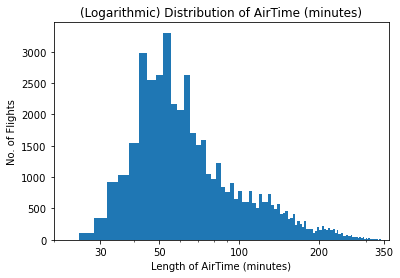

In [38]:
log_binsize = 5;
xtick_vals = 10 ** np.arange(df_clean['DepDelay'].min() - 5, np.log10(df_clean['DepDelay'].max()) + log_binsize, log_binsize)

plt.hist(data=df_clean, x='DepDelay', bins=100);
plt.xscale('log');
plt.title('(Logarithmic) Distribution of DepDelay (minutes)');
plt.xlim(df_clean['AirTime'].min() - 5, df_clean['AirTime'].max() + 5);
plt.ylabel('No. of Flights');
plt.xlabel('Length of AirTime (minutes)');
plt.xticks([30, 50, 100, 200, 350], [30, 50, 100, 200, 350]);
plt.show();

The `AirTime` values are highly skewed to the right, therefore the logarithmic scale is appropriate for the x-axis. 

The mode appears to be approximately `50` minutes. There appears to be a slight secondary peak in the data at approximatley `200` minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!